# Working with Dates and Times in Python
Instructor: Max Shron ([course link](https://learn.datacamp.com/courses/working-with-dates-and-times-in-python))  
Note Taker: Paris Zhang on Aug 15, 2020

Course Overview:
* Chapter 1: Dates and Calendars
 + The `date()` class takes a year, month, and day as arguments
 + A `date` object has accessors like `.year`, and also methods like `.weekday()`
 + `date` objects can be compared like numbers, using `min()` , `max()` , and `sort()`
 + You can subtract one `date` from another to get a `timedelta`
 + To turn `date` objects into strings, use the `.isoformat()` or `.strftime()` methods
* Chapter 2: Combining Dates and Times
 + The `datetime()` class takes allthe arguments of `date()` , plus an hour, minute, second, and microsecond
 + All ofthe additional arguments are optional; otherwise,they're set to zero by default
 + You can replace any value in a `datetime` with the `.replace()` method
 + Convert a `timedelta` into an integer with its `.total_seconds()` method
 + Turn strings into dates with `.strptime()` and dates into strings with `.strftime()`
* Chapter 3: Time zones and Daylight Saving
 + A `datetime` is "timezone aware" when it has its `tzinfo` set. Otherwise it is "timezone naive"
 + Setting a timezone tells a `datetime` how to align itselfto UTC,the universaltime standard
 + Use the `.replace()` method to change the timezone of a `datetime` , leaving the date and time the same
 + Use the `.astimezone()` method to shift the date and time to match the new timezone
 + `dateutil.tz` provides a comprehensive, updated timezone database
* Chapter 4: Dates and Times in Pandas
 + When reading a csv, set the `parse_dates` argument to be the list of columns which should be parsed as datetimes
 + If setting `parse_dates` doesn't work, use the `pd.to_datetime()` function
 + Grouping rows with `.groupby()` lets you calculate aggregates per group. For example, `.first()` , `.min()` or `.mean()`
 + `.resample()` groups rows on the basis of a `datetime` column, by year, month, day, and so on
 + Use `.tz_localize()` to set a timezone, keeping the date and time the same
 + Use `.tz_convert()` to change the date and time to match a new timezone

## Chapter 1 - Dates and Calendars

### 1.1 - Dates in Python
* `from datetime import date`
* Create a date object: `date(2020, 8, 15)`
* Attributes of a date: `.year`, `.month`, `.day`
* Date methods: `.weekday()`

In [1]:
from datetime import date

# Create dates
two_hurricanes_dates = [date(2016, 10, 7), date(2017, 6, 21)]
print(two_hurricanes_dates)

[datetime.date(2016, 10, 7), datetime.date(2017, 6, 21)]


### 1.2 - Math with dates
* `from datetime import date` or `import timedelta`
* For `timedelta`, use object = `timedelta(days = n)`
* Use Python built-in function `sorted()` to sort date obejcts

### 1.3 - Turning dates into strings
* Default is **ISO 8601** format
* Every other format: `.strftime()` format [reference](https://strftime.org/) - `f` for format

In [2]:
from datetime import date

d = date(2017, 11, 5)
print(d) # ISO format: YYYY-MM-DD

2017-11-05


In [3]:
# Express the date in ISO 8601 format and put it in a list
print([d.isoformat()])

['2017-11-05']


In [4]:
# A few dates that computers once had trouble with
some_dates = ['2000-01-01', '1999-12-31']

# Print them in order
print(sorted(some_dates))

['1999-12-31', '2000-01-01']


In [5]:
# Format string with more text in it
print(d.strftime("Year is %Y"))

Year is 2017


In [6]:
# Print the date in the format 'YYYY-DDD' (day of the year)
print(d.strftime('%Y-%j'))

2017-309


## Chapter 2 - Combining Dates and Times

### 2.1 - Dates and times
* `from datetime import datetime`
* Creating datetime object - `datetime(2020,8,15,17,3,48)`
* We could specify time unit to nanosecond, the default is microsecond
* Replacing parts of a datetime object - `dt.replace(minute=0, second=0, microsecond=0)`

In [7]:
from datetime import datetime

dt = datetime(year=2017, month=10, day=1,
              hour=15, minute=23, second=25,
              microsecond=500000)
print(dt)

2017-10-01 15:23:25.500000


### 2.2 - Printing and parsing datetimes
* Parsing datetimes with `datetime.strptime()` - `datetime.strptime("12/30/2017 15:19:13","%m/%d/%Y %H:%M:%S")`
* Parsing datetimes with `pandas` with `datetime.fromtimestamp`, from timestamp (seconds from Unix timestamps, Jan 1 1970) - `(datetime.fromtimestamp(Object)` 

### 2.3 - Working with durations
* Subtract datetimes to create a timedelta or use `timedelta()`. e.g., getting duration seconds by `.total_seconds()`
* Can applye subtractions & additions
* Timedelta can be negative

In [8]:
start = datetime(2017, 10, 8, 23, 46, 47)
end = datetime(2017, 10, 9, 0, 10, 57)

duration = end - start
print(duration.total_seconds())

1450.0


In [9]:
from datetime import timedelta
delta1 = timedelta(seconds = 1)
print(start + delta1)

2017-10-08 23:46:48


In [10]:
delta2 = timedelta(days=1, seconds=1)
print(start + delta2)

2017-10-09 23:46:48


## Chapter 3 - Time Zones and Daylight Saving

### 3.1 - UTC offsets
* The `-05:00` in the datetime object is called **UTC offsets**
* `from datetime import datetime, timedelta, timezone`
* `timezone()`
* `datetime(..., tzinfo = TIMEZONE Object)`
* `.astimezone(timezone.utc)` or `.replace(tzinfo = TIMEZONE Object)`

In [11]:
from datetime import datetime, timedelta, timezone

# US Eastern Standard time zone
ET = timezone(timedelta(hours=-5))
# Timezone-aware datetime
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo = ET)
print(dt)

2017-12-30 15:09:03-05:00


In [12]:
# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)
print(dt.isoformat())

2017-10-01T15:26:26-08:00


### 3.2 - Time zone database
* tz database - `from dateutil import tz`, updates 3 to 4 times a year as time rule changes
* Format: 'Continent/City', set by `tz.gettz()`
* Examples:
 + 'America/New_York'
 + 'America/Mexico_City'
 + 'Europe/London'
 + 'Africa/Accra'
* `tz` adapts to different timezones on different days (see example below)

In [13]:
from datetime import datetime
from dateutil import tz

# Eastern time
et = tz.gettz('America/New_York')

# Last ride
last = datetime(2017, 12, 30, 15, 9, 3, tzinfo=et)
# First ride
first = datetime(2017, 10, 1, 15, 23, 25, tzinfo=et)

print(last,first,sep="\n")

2017-12-30 15:09:03-05:00
2017-10-01 15:23:25-04:00


**Fun fact**: Time offset for Samoa is UTC+14. Samoa used to be UTC-10, but in 2011 it changed to the other side of the International Date Line to better match New Zealand, its closest trading partner. However, they wanted to keep the clocks the same, so the UTC offset shifted from -10 to +14, since 24-10 is 14.

In [14]:
sm = tz.gettz('Pacific/Apia')

local = datetime(2017, 10, 1, 15, 23, 25, tzinfo=et)

# What time was it in Samoa?
notlocal = local.astimezone(sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T09:23:25+14:00


### 3.3 - Starting daylight saving time
* Handle when **spring ahead**: on the 2nd Sunday in March (daylight saving starts), 01:59:59 jumps directly to 03:00:00. 
* Acronoyms for timezones:
 + PST = pacific standard time
 + PDT = pacific daylight time (summer time / daylight saving time)
 + EST = eastern standard time
 + EDT = eastern daylight time
* The `dateutil` solves evolving daylight saving time problem

1. If we mannually create datetime object to reflect daylight saving time (on this day, 01:59:59 jumps directly to 03:00:00, so practically there's only a ONE-SECOND gap):

In [24]:
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)

print(
    spring_ahead_159am.isoformat(),
    spring_ahead_3am.isoformat(),
    (spring_ahead_3am - spring_ahead_159am).total_seconds(),
    sep = "\n"
)

2017-03-12T01:59:59
2017-03-12T03:00:00
3601.0


In [25]:
from datetime import timezone, timedelta
EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

spring_ahead_159am = spring_ahead_159am.replace(tzinfo = EST)
spring_ahead_3am = spring_ahead_3am.replace(tzinfo = EDT)

print(
    spring_ahead_159am.isoformat(),
    spring_ahead_3am.isoformat(),
    (spring_ahead_3am - spring_ahead_159am).seconds,
    sep = "\n"
)

2017-03-12T01:59:59-05:00
2017-03-12T03:00:00-04:00
1


In [27]:
# March 29, throughout a decade

from datetime import datetime
from dateutil import tz

dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


### 3.4 - Ending daylight saving time
* Handle when we **fall back**: on the 1st Sunday in November (daylight saving ends), 01:59:59 falls back to 01:00:00.
* `tz.datetime_ambiguous()` tells if this datetime is ambiguous, i.e., represents two 01:00:00 (first or second)
* `tz.enfold()` sets a placeholder to the datetime and indicates that this is the second 01:00:00, but `tz.enfold()` has to be combined with other functions to work, otherwise it's just a placeholder.

In [28]:
eastern = tz.gettz('US/Eastern')
# 2017-11-05 01:00:00
first_1am = datetime(2017, 11, 5, 1, 0, 0,
                     tzinfo = eastern)
tz.datetime_ambiguous(first_1am)

True

In [29]:
# 2017-11-05 01:00:00 again
second_1am = datetime(2017, 11, 5, 1, 0, 0,
                      tzinfo = eastern)
second_1am = tz.enfold(second_1am) # Doesn't return anything

In [30]:
(first_1am - second_1am).total_seconds()

0.0

In [31]:
first_1am = first_1am.astimezone(tz.UTC)
second_1am = second_1am.astimezone(tz.UTC)

(first_1am - second_1am).total_seconds()

-3600.0

## Chapter 4 - Dates and Times in Pandas

### 4.1 - Reading date and time data in Pandas

In [32]:
import pandas as pd

rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ['Start date','End date'])

# Print the initial (0th) row
print(rides.iloc[0])

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object


In [63]:
ride_durations = rides['End date'] - rides['Start date']

rides['Duration'] = ride_durations
# `pandas.Series.dt.total_seconds`
print(rides['Duration'].dt.total_seconds().head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


### 4.2 - Summarizing datetime data in Pandas

* Summary statistics - `.mean()`, `.sum()`, can do calculations
* `.value_counts()` - frequencies of unique values
* In addition to `.groupby()`, `.resample('M', on = var)` can group date objects by MONTH
* `.size()` (different from `.value_counts()`)
* `.first()`

In [38]:
# Percent of time out of the dock
rides['Duration'].sum() / timedelta(days=91)

0.04348417785917786

In [39]:
# Count how many time the bike started at each station
rides['Member type'].value_counts()

Member    236
Casual     54
Name: Member type, dtype: int64

In [40]:
# Percent of rides by member
rides['Member type'].value_counts() / len(rides)

Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64

In [41]:
# Add duration (in seconds) column
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()
# Average duration per member type
rides.groupby('Member type')['Duration seconds'].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

In [42]:
# Average duration by month
rides.resample('M', on = 'Start date')['Duration seconds'].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration seconds, dtype: float64

In [43]:
# Size per group
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

In [44]:
# First ride per group
rides.groupby('Member type').first()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration seconds
Member type,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,02:07:02,7622.0
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,00:03:01,181.0


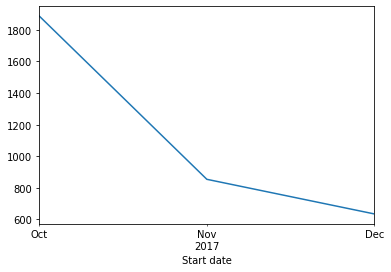

In [46]:
rides\
  .resample('M', on ='Start date')\
  ['Duration seconds']\
  .mean()\
  .plot()

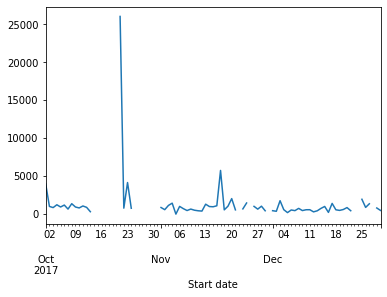

In [47]:
rides\
  .resample('D', on = 'Start date')\
  ['Duration seconds']\
  .mean()\
  .plot()

In [52]:
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration seconds'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration seconds'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


In [53]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample("M", on = "Start date")['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


In [55]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample("M", on = 'Start date')

print(grouped['Duration seconds'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration seconds, dtype: float64


### 4.3 - Additional datetime methods in Pandas

* `.dt.tz_localize()` in pandas to set timezone for datetime objects. Add `ambiguous = "NaT"` to set any ambiguous datetimes Not a Time and pandas will ignore this datetime.
* `.dt.tz_convert()` to convert timezones. e.g., 'America/New_York' to 'Europe/London'.
* Datetime-related attributes: `.dt.weekday_name`, `.dt.month`.

In [64]:
rides['Duration'].dt.total_seconds().min()

116.00000000000001

In [57]:
rides['Start date'].head(3)

0   2017-10-01 15:23:25
1   2017-10-01 15:42:57
2   2017-10-02 06:37:10
Name: Start date, dtype: datetime64[ns]

In [58]:
rides['Start date'].head(3)\
  .dt.tz_localize('America/New_York')

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

In [59]:
# Handle ambiguous datetimes
rides['Start date'] = rides['Start date']\
  .dt.tz_localize('America/New_York', ambiguous='NaT')
rides['End date'] = rides['End date']\
  .dt.tz_localize('America/New_York', ambiguous='NaT')

In [65]:
# Re-calculate duration, ignoring bad row
rides['Duration'] = rides['Start date'] - rides['End date']
# Find the minimum again
rides['Duration'].dt.total_seconds().min()

-76913.0

In [66]:
# Look at problematic row
rides.iloc[129]

Start date                        NaT
End date                          NaT
Start station number            31615
Start station           6th & H St NE
End station number              31627
End station             3rd & M St NE
Bike number                    W20529
Member type                    Member
Duration                          NaT
Duration seconds                -3346
Name: 129, dtype: object

In [67]:
# Year of first three rows
rides['Start date']\
  .head(3)\
  .dt.year

0    2017
1    2017
2    2017
Name: Start date, dtype: int64

In [68]:
# See weekdays for first three rides
rides['Start date']\
  .head(3)\
  .dt.weekday_name

0    Sunday
1    Sunday
2    Monday
Name: Start date, dtype: object

In [69]:
# Shift the indexes forward one, padding with NaT
rides['End date'].shift(1).head(3)

0                         NaT
1   2017-10-01 15:26:26-04:00
2   2017-10-01 17:49:59-04:00
Name: End date, dtype: datetime64[ns, America/New_York]

In [70]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample("M",on='Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31 00:00:00-04:00    5.519242
2017-11-30 00:00:00-05:00    7.256474
2017-12-31 00:00:00-05:00    9.202380
Name: Time since, dtype: float64
